In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Titanic Dataset Analysis - Part1**

### **Dataset Download**

In [407]:
# Load the Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [408]:
# Display the first few rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [409]:
# Display summary information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [410]:
# Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **1. Data Cleaning**

In [411]:
# Fill missing ages with median age based on passenger class
titanic['Age'] = titanic.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [412]:
# Fill missing 'Cabin' values with 'Unknown'
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

In [413]:
def age_category(age):
    if age <= 15:
        return 'Child'
    elif 16 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 45:
        return 'Adult'
    elif 46 <= age <= 60:
        return 'Middle Aged'
    else:
        return 'Senior'

titanic['AgeCategory'] = titanic['Age'].apply(age_category)

In [414]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [415]:
# Fill missing 'embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

<ipython-input-415-fd4bc26aea99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [416]:
# Verify data cleaning
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
AgeCategory    0
dtype: int64


In [417]:
# Display the first few rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult


### **2. Feature Engineering**

In [418]:
# Combine 'SibSp' and 'Parch' ألأخوة و الأزواج Create a new column showing total family members
titanic['FamilyMembers'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,1


In [419]:
# Extract titles (Mr, Mrs, Miss, etc.) from passenger names
# Extract titles using string split
# ',\s*([^\.]+)\.' this called regex expression used to find patterns in strings
# The r before the regular expression indicates that the string is a raw string literal in Python
# ',': Matches the comma that precedes the title.
# \s*: Matches any whitespace after the comma.
# ([^\.]+): Captures everything until the next period (this is the title).
# [^\.]: Matches any character except a period.
# +: Matches one or more of the previous character.
# '\.': Matches the period after the title.

titanic['Titles'] = titanic['Name'].str.extract(r',\s*([^\.]+)\.')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilyMembers,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,1,Mr


In [420]:
titanic['Titles'].value_counts()

,count
Titles,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [421]:
# Replace rare or uncommon titles with 'Other'
title_mapping = {
    "Capt": "Other", "Col": "Other", "Don": "Other", "Dr": "Other", "Major": "Other",
    "Rev": "Other", "Sir": "Other", "Jonkheer": "Other", "Dona": "Other",
    "Lady": "Royalty", "the Countess": "Royalty", "Mme": "Mrs", "Mlle": "Miss",
    "Ms": "Miss"
}
titanic['Titles'] = titanic['Titles'].replace(title_mapping)

In [422]:
titanic['Titles'].value_counts()

,count
Titles,
Mr,517
Miss,185
Mrs,126
Master,40
Other,21
Royalty,2


In [423]:
# Fill missing values in 'Fare' with median fare of the corresponding Pclass
titanic['Fare'] = titanic.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [424]:
print(titanic['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [425]:
fare_bins = [-1, 7.91, 14.45, 31, 512]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
titanic['FareRange'] = pd.cut(titanic['Fare'], bins=fare_bins, labels=fare_labels)

# Calculate fare per person
titanic['FarePerPerson'] = titanic['Fare'] / titanic['FamilyMembers']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilyMembers,Titles,FareRange,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult,2,Mr,Low,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs,Very High,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,1,Miss,Medium,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2,Mrs,Very High,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,1,Mr,Medium,8.05000


In [426]:
# Extract deck information from Cabin
titanic['Deck'] = titanic['Cabin'].str[0] # Extract the first letter of the Cabin column
titanic['Deck'] = titanic['Deck'].replace({'T': 'Other'})  # Handle uncommon deck entries
titanic['Deck'] = titanic['Deck'].fillna('Unknown') # If there are very rare decks these can be grouped under 'Other'

In [427]:
# Display the updated dataset
print("Updated Dataset with New Features:")
print(titanic.head())

# Save the updated dataset for further analysis
titanic.to_csv("titanic_feature_engineered.csv", index=False)

Updated Dataset with New Features:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  AgeCategory  \
0      0         A/5 21171   7.2500  Unknown        S  Young Adult   
1      0          PC 17599  71.2833      C85        C        Adult   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Young Adult   
3    

### **3. Visualizations**

<ipython-input-428-7bf1c466c65a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Pclass', palette='muted')


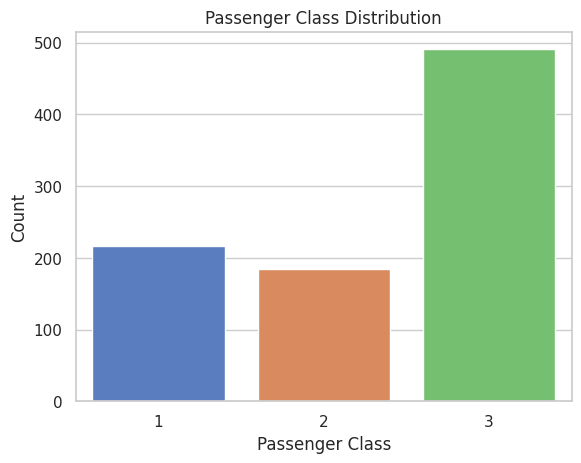

In [428]:
sns.countplot(data=titanic, x='Pclass', palette='muted')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

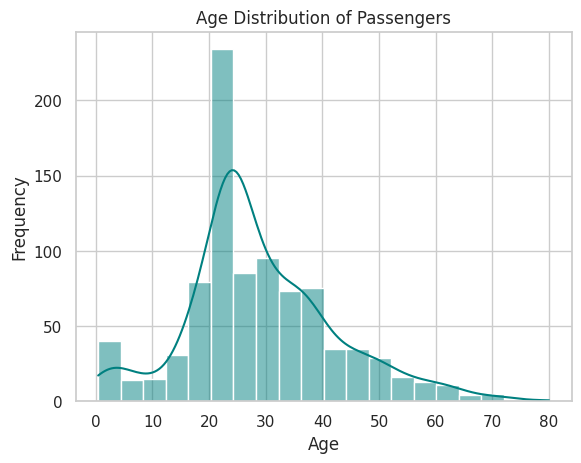

In [429]:
sns.histplot(data=titanic, x='Age', kde=True, bins=20, color='teal')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

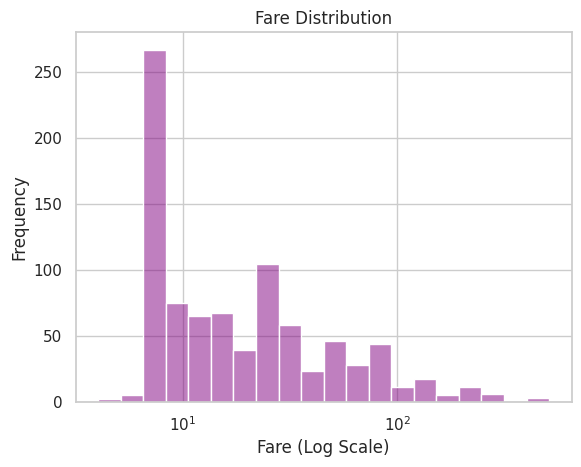

In [430]:
sns.histplot(data=titanic, x='Fare', kde=True, bins=20, color='purple', log_scale=(True, False))
plt.title('Fare Distribution')
plt.xlabel('Fare (Log Scale)')
plt.ylabel('Frequency')
plt.show()

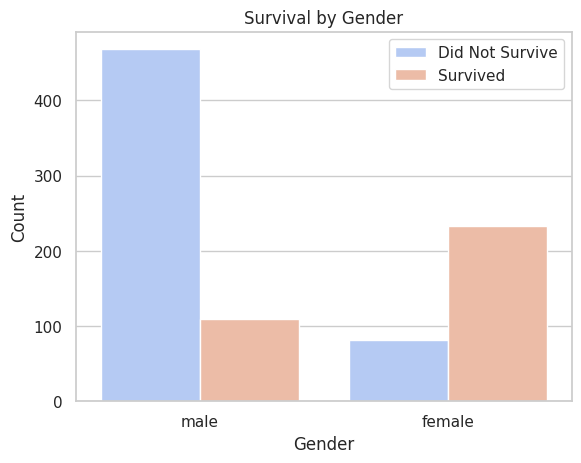

In [431]:
sns.countplot(data=titanic, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

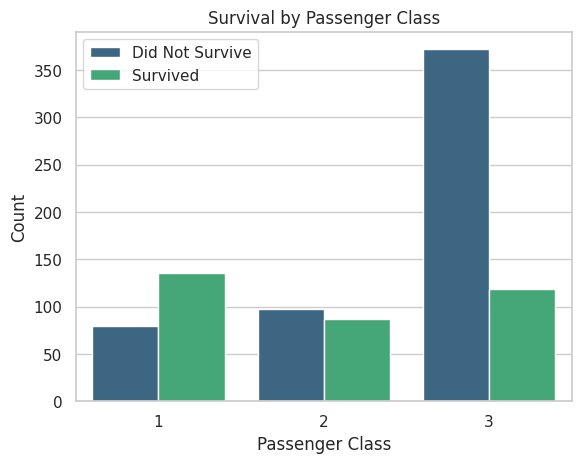

In [432]:
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

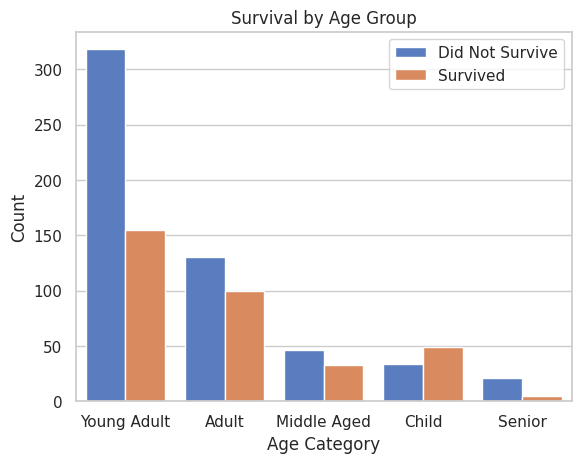

In [433]:
sns.countplot(data=titanic, x='AgeCategory', hue='Survived', palette='muted')
plt.title('Survival by Age Group')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

<ipython-input-434-b7855eea8e69>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='FamilyMembers', y='Survived', palette='mako')


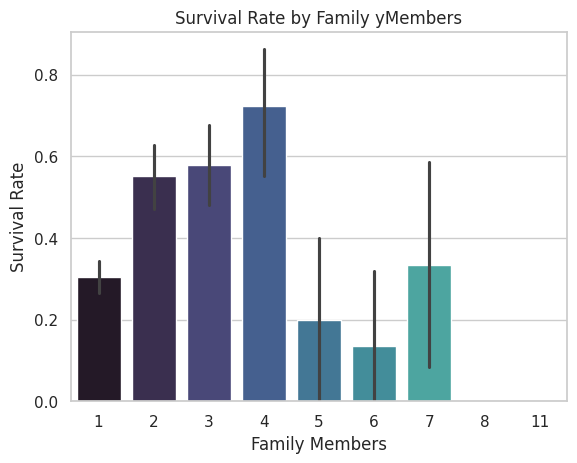

In [434]:
sns.barplot(data=titanic, x='FamilyMembers', y='Survived', palette='mako')
plt.title('Survival Rate by Family yMembers')
plt.xlabel('Family Members')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-435-c0cb744e8a96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='Titles', y='Survived', palette='Set2')


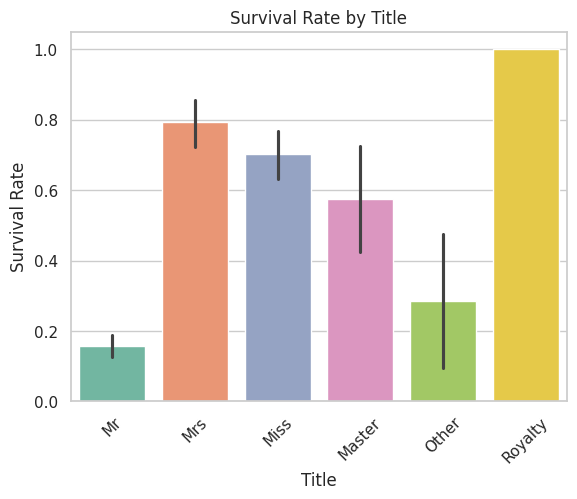

In [435]:
sns.barplot(data=titanic, x='Titles', y='Survived', palette='Set2')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

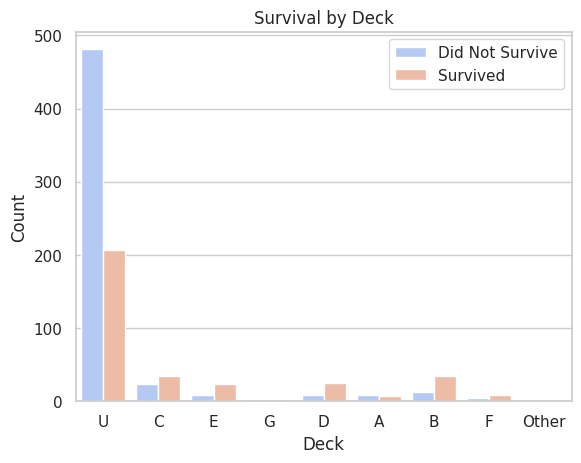

In [436]:
sns.countplot(data=titanic, x='Deck', hue='Survived', palette='coolwarm')
plt.title('Survival by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

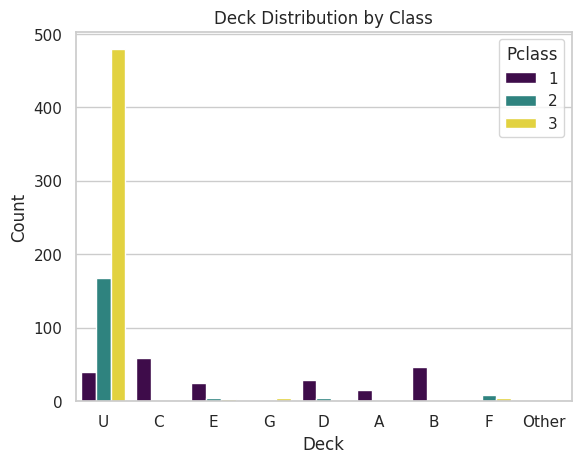

In [437]:
sns.countplot(data=titanic, x='Deck', hue='Pclass', palette='viridis')
plt.title('Deck Distribution by Class')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

# **Titanic Dataset Analysis - Part2**

### **Dataset Download**

In [438]:
df = pd.read_csv('titanic_feature_engineered.csv')

In [439]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilyMembers,Titles,FareRange,FarePerPerson,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult,2,Mr,Low,3.62500,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs,Very High,35.64165,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,1,Miss,Medium,7.92500,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2,Mrs,Very High,26.55000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,1,Mr,Medium,8.05000,U


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          891 non-null    object 
 11  Embarked       891 non-null    object 
 12  AgeCategory    891 non-null    object 
 13  FamilyMembers  891 non-null    int64  
 14  Titles         891 non-null    object 
 15  FareRange      888 non-null    object 
 16  FarePerPerson  891 non-null    float64
 17  Deck           891 non-null    object 
dtypes: float64

### **1. Basic Analysis**

In [441]:
# Survival rates by Passenger Class
class_survival = df.groupby('Pclass')['Survived'].mean()
print(class_survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [442]:
gender_survival = df.groupby('Sex')['Survived'].mean()
print(gender_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [443]:
age_survival = df.groupby('AgeCategory')['Survived'].mean()
print(age_survival)

AgeCategory
Adult          0.434783
Child          0.590361
Middle Aged    0.417722
Senior         0.192308
Young Adult    0.327696
Name: Survived, dtype: float64


In [444]:
# Survival rates by Deck
deck_survival = df.groupby('Deck')['Survived'].mean()
print(deck_survival)

Deck
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
Other    0.000000
U        0.299854
Name: Survived, dtype: float64


In [445]:
# Survival rates by Port of Embarkation
port_survival = df.groupby('Embarked')['Survived'].mean()
print(port_survival)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [446]:
# Categorize family size
def categorize_family_size(size):
    if size == 1:
        return 'Alone'
    elif 2 <= size <= 4:
        return 'Small Family'
    else:
        return 'Large Family'

df['FamilyCategory'] = df['FamilyMembers'].apply(categorize_family_size)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilyMembers,Titles,FareRange,FarePerPerson,Deck,FamilyCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult,2,Mr,Low,3.62500,U,Small Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs,Very High,35.64165,C,Small Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,1,Miss,Medium,7.92500,U,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2,Mrs,Very High,26.55000,C,Small Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult,1,Mr,Medium,8.05000,U,Alone


In [447]:
# Survival rates by family category
family_survival = df.groupby('FamilyCategory')['Survived'].mean()
print(family_survival)

FamilyCategory
Alone           0.303538
Large Family    0.161290
Small Family    0.578767
Name: Survived, dtype: float64


In [448]:
# Create a column indicating if a passenger is alone
df['IsAlone'] = df['FamilyMembers'].apply(lambda x: 1 if x == 1 else 0) # 1 means it is traveling alone & 0 means not alone

In [449]:
alone_survival = df.groupby('IsAlone')['Survived'].mean()
print(alone_survival)

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


### **2. Advanced Analysis**

In [450]:
# Pivot table: Survival rates by Class and Gender
pivot_class_gender = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print(pivot_class_gender)

# Pivot table: Survival rates by Age Group and Class
pivot_age_class = df.pivot_table(values='Survived', index='AgeCategory', columns='Pclass', aggfunc='mean')
print(pivot_age_class)

# Pivot table: Survival rates by Deck and Class
pivot_deck_class = df.pivot_table(values='Survived', index='Deck', columns='Pclass', aggfunc='mean')
print(pivot_deck_class)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447
Pclass              1         2         3
AgeCategory                              
Adult        0.645161  0.462963  0.180723
Child        0.833333  1.000000  0.431034
Middle Aged  0.574468  0.300000  0.000000
Senior       0.200000  0.333333  0.125000
Young Adult  0.745455  0.409091  0.236364
Pclass         1         2         3
Deck                                
A       0.466667       NaN       NaN
B       0.744681       NaN       NaN
C       0.593220       NaN       NaN
D       0.758621  0.750000       NaN
E       0.720000  0.750000  1.000000
F            NaN  0.875000  0.200000
G            NaN       NaN  0.500000
Other   0.000000       NaN       NaN
U       0.475000  0.440476  0.235908


In [451]:
# Pivot table: Survival rates by Class and Gender
pivot_class_gender = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')        # values: The column(s) to aggregate
# Replace NaN with the column mean                                                                           # index: Rows of the pivot table
pivot_filled_column_class_gender = pivot_class_gender.apply(lambda col: col.fillna(col.mean()), axis=0) # columns: Columns of the pivot table
print(pivot_filled_column_class_gender)                                                                      # aggfunc: Aggregation function (mean, sum, etc.). Default is mean

# Pivot table: Survival rates by Age Group and Class
pivot_age_class = df.pivot_table(values='Survived', index='AgeCategory', columns='Pclass', aggfunc='mean')
# Replace NaN with the column mean
pivot_filled_column_age_class = pivot_age_class.apply(lambda col: col.fillna(col.mean()), axis=0)
print(pivot_filled_column_age_class)

# Pivot table: Survival rates by Deck and Class
pivot_deck_class = df.pivot_table(values='Survived', index='Deck', columns='Pclass', aggfunc='mean')
# Replace NaN with the column mean
pivot_filled_column_deck_class = pivot_deck_class.apply(lambda col: col.fillna(col.mean()), axis=0)
print(pivot_filled_column_deck_class)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447
Pclass              1         2         3
AgeCategory                              
Adult        0.645161  0.462963  0.180723
Child        0.833333  1.000000  0.431034
Middle Aged  0.574468  0.300000  0.000000
Senior       0.200000  0.333333  0.125000
Young Adult  0.745455  0.409091  0.236364
Pclass         1         2         3
Deck                                
A       0.466667  0.703869  0.483977
B       0.744681  0.703869  0.483977
C       0.593220  0.703869  0.483977
D       0.758621  0.750000  0.483977
E       0.720000  0.750000  1.000000
F       0.536884  0.875000  0.200000
G       0.536884  0.703869  0.500000
Other   0.000000  0.703869  0.483977
U       0.475000  0.440476  0.235908


In [452]:
from scipy.stats import pearsonr, chi2_contingency # pearsonr(x, y): Computes the Pearson correlation coefficient and its p-value.
                                                   # chi2_contingency(contingency): Performs the chi-square test of independence.

# Correlation between Fare and Survival              # corr: Pearson correlation coefficient (ranges from -1 to 1).
corr, p_value = pearsonr(df['Fare'], df['Survived']) # p_value: Indicates if the correlation is statistically significant. (p < 0.05: Correlation is significant.)
print(f"Correlation between Fare and Survival: {corr}, p-value: {p_value}")                                              # (p ≥ 0.05: No significant correlation.)

# Chi-square test for independence between Pclass and Survival
# Create a contingency table
contingency = pd.crosstab(df['Pclass'], df['Survived'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency) # contingency: A 2D table showing the frequency counts for combinations of Pclass and Survived.
print(f"Chi-square test: chi2: {chi2}, p-value: {p}")

#Summary
#Fare vs Survival (Pearson Correlation):
#Weak positive correlation (0.2573).
#Statistically significant (p<0.05).

#Pclass vs Survival (Chi-Square Test):
#Strong association (x^2=102.89).
#Extremely significant (p<0.05).

Correlation between Fare and Survival: 0.2573065223849624, p-value: 6.120189341924608e-15
Chi-square test: chi2: 102.88898875696056, p-value: 4.549251711298793e-23


### **3. Visualization**

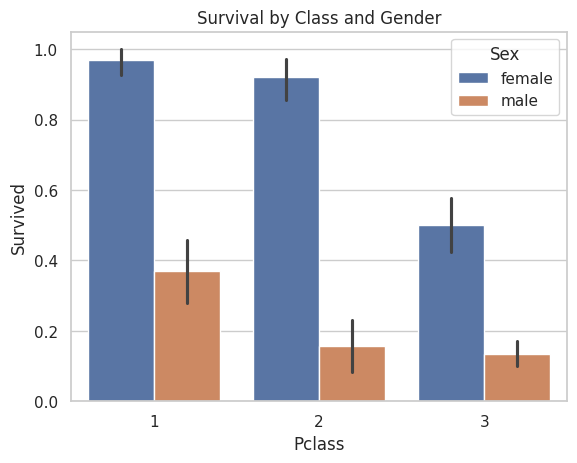

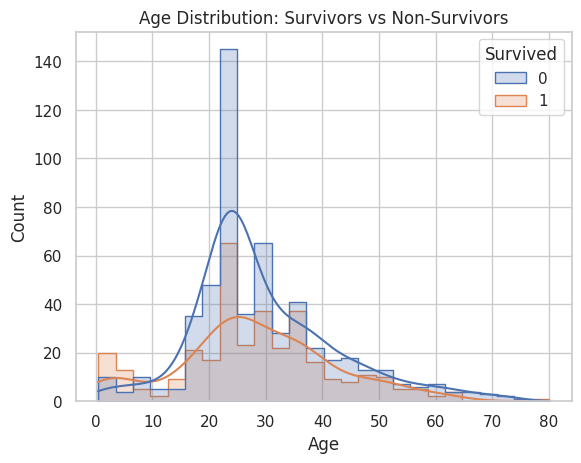

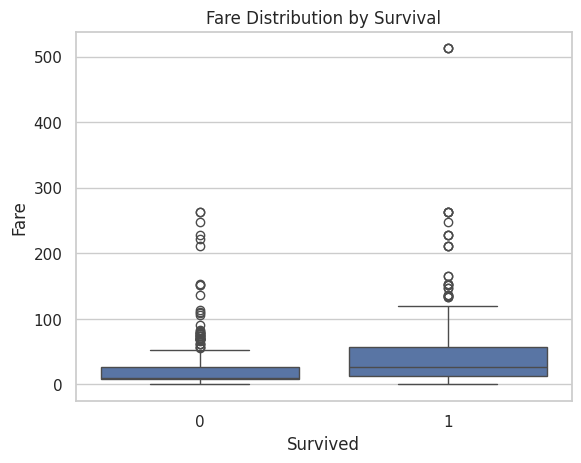

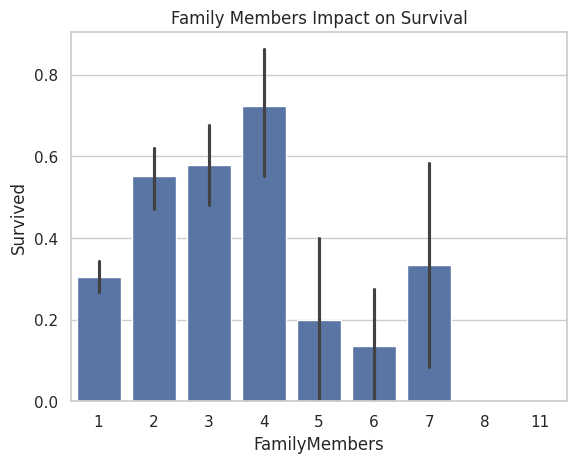

In [453]:
# Set a theme
sns.set_theme(style="whitegrid")

# Survival distribution by Passenger Class and Gender
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival by Class and Gender')
plt.show()

# Age distribution of Survivors vs Non-Survivors
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()

# Fare distribution analysis
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

# Family size impact on survival
sns.barplot(x='FamilyMembers', y='Survived', data=df)
plt.title('Family Members Impact on Survival')
plt.show()